# Introduction

## Background:
We have heard many conflicting reports of COVID-19 and its variants causing similar symptoms to the flu. It makes us wonder if the influenza sequence appears to be similar to COVID's sequence. Because of this, it can be used as a stepping point to studying the consequences of the viral infection and its effect on lung epithelial transcriptomes. One of the biggest findings from this scientific article are the seven genes that were discovered using RNA sequencing that affected the SARS-CoV-2 infection of typical human epithelial cells. Using microarray data they were able to discover the impact of viral infections on the human lung epithelial cell transcriptome, and using comparative analysis of DEGs they were able to identify the SARS-CoV-2 infection-specific gene that was most affected by respiratory and viral infection. 

https://www.nature.com/articles/s41598-021-95733-w

## Scientific Question: 
How genetically similar are COVID and its variants to influenza and do they affect the same genes in identical quantities?

## Scientific Hypothesis: 
If SARS-CoV-2 and influenza infections are similar but differ between variants, then we should expect to see at least 50% of expressed genes shared between influenza and SARS-CoV-2, as well as a difference of at least 5% when comparing sequence identity between the COVID variants and influenza versus the original strand and influenza. 

## Data Analaysis/Download: 
In order to compare the genetic similarity and sequence identity between SARS-CoV-2 and influenza, we will use BLAST. Furthermore, after comparing sequence identity, we can use BLAST to find the most closely related viruses to SARS-CoV-2/delta and influenza. After finding related sequences, we can use the MEGA software to perform and visualize phylogenetic trees/clustering. Data will be retrieved from NCBI's nucleotide database. In order to compare gene expression between SARS-CoV-2 and influenza, we will compare gene expression that was processed using DESEQ2 using RNA-seq between two lung samples infected by SARS-CoV-2 and influenza respectively. We will visualize levels of expression and shared genes using a heatmap. Data will be retrieved from NCBI's Gene Expression Omnibus.

Tools 
- BLAST: https://blast.ncbi.nlm.nih.gov/Blast.cgi

- MEGA:https://www.megasoftware.net/

NCBI Nucleotide Accessions:

- Sars-CoV-2 Refseq: NC_045512

- Sars-CoV-2 Delta: MZ208926

- Influenza samples: NC_007373, CY259943

NCBI GEO Accessions:

- Sars-CoV-2 lung: GSE153970

- Influenza lung: GSE48575

## Packages:
Bio.Blast.Applications: Bio.Blast.Applications is a commandline/package to connect NCBI BLAST to one's very own Jupyter notebook. It can be used to gather information from protein-protein, nucleotide-nucleotide, translated query-protein subject and more. It is very useful when needed to gather information from NCBI and it saves time and space when wanted to just look up certain accessions directly from the source itself. It uses BLAST to find areas of similarity between certain biological sequences such as query DNA/RNA sequences and DNA/RBA sequences found in the database. It's an important algorithm that can be used in order to compare these sequences to one another to see if they have a commonality between each other. 
https://biopython.org/docs/1.76/api/Bio.Blast.Applications.html

Matplotlib.pylot: Matplotlib.pylot has a multitiude of functions used to create/build figures within one's Jupyter notebook. This can be compared to MATLAB. These figures include but not limited to bar graphs, line graphs, and scatterplots. The figures created from matplotlib.pyplot will be used for data analysis and as supported evidence for research. It can also be used to alter axes and plotting methods. 
https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.html

Bio/Biopython: This python package is used when handling biological data. It is a faster and easier method when performing common bioinformatics tasks and software development. It also requires numpy in other to perform data analysis on arrays. It can also be used together in combination with other packages in order to create/display biological data. It deals with data pertaining to DNA, RNA, and protein sequences.
https://github.com/biopython/biopython/blob/master/README.rst

Bio.Phylo: This is a package used to create phylogenetic trees. It does this by using a combination of matplotlib and bio.phylo with each other to display this visual data. This data display can come from sdf files that can be found online on websites like BLAST. It produces a phylogenetic tree that displays the common ancestry and relation of organisms, viruses, etc. to one other. This is very useful in python when wanting something automatic to create a visual to present data.
https://biopython.org/wiki/Phylo

Numpy: Numpy or Numerical Python is a python library that is used with arrays. It contains matrix data structures and mutlti-dimensional arrays. Arrays are a list of values that can be indexed using numpy. It can be used to computute data and formulate data analysis. Using these arrays, it can perform calculations such as algerbraic and statstical routines and store data with large amounts of data. 
https://cs231n.github.io/python-numpy-tutorial/

Pandas: Pandas is a python library that is used for data analysis. It acts very similarly to excel and is useful for computational data. Pandas can be used to read dataframes and use that data for further analysis for any experiment. It's most useful when wanting to import data from a spreadsheet or excel but not wanting to refer to it separately and instead imoporting it directly into one's notebook. It can also allow one to merge, reshape, select data and more. 
https://pythonprogramming.net/data-analysis-python-pandas-tutorial-introduction/

Plotly.express: This is another method to creating data visualizaation or figures when wanting to present information. It is a built in program that can be found in Puthon and creates a wide range of visuals. It is similiar to mathplotlib but not as commonly used. However, it does provide different products such as dash and chart studio cloud for users to operate through. It can also create the same figurs as mathplotlib such as bar graphs, scatterplots, and more.
https://plotly.com/python/plotly-express/

In [1]:
# Install BLAST for comparison of sequences
# conda install -c bioconda blast

# Install MAFFT for multiple sequence alignment
# conda install -c bioconda mafft

In [2]:
from Bio.Blast.Applications import NcbiblastpCommandline 
import matplotlib.pyplot as plt
from Bio import Phylo
from Bio import AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio.Phylo.Consensus import bootstrap_consensus, majority_consensus
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.renderers.default="notebook"

In [3]:
# Renaming files and placing into directory to make it easier to find/use

covid19_fasta = "project2_files/covid19_spike.fasta"
delta_fasta = "project2_files/delta_spike.fasta"
omicron_fasta = "project2_files/omicron_spike.fasta"
h1n1_fasta = "project2_files/h1n1_ha.fasta"
h3n2_fasta = "project2_files/h3n2_ha.fasta"

## BLAST

- BLAST or Basic Local Alignment Search Tool is used to compare regions of similiarity between sequences. It can be used to compare query DNA/RNA/proteins sequences with DNA/RNA/proteins sequences within the database.
- The sequences from BLAST were retrieved from NCBI's genbank and nucleotide database and were gathered as fasta files.
- A fasta file is text compiled of either protein or nucleotide sequences.

In [4]:
# write blast comparison to output file
def output_blast(query_fa, subject_fa, out_file):
    cline = NcbiblastpCommandline(query=query_fa, subject=subject_fa) # run blast
    output = str(cline()[0]) # retrieve output
    
    with open(out_file, "w") as file: # open output file
        file.write(output) # write blast output to file

In [5]:
# BLAST is a method used to compare areas of similiarity in nucleotides or proteins. 
# In this case, we will be comaparing the variants to the original in order to see if there is any similarity between the two strands.

# BLAST compare COVID variants against original

# Compare delta vs original variant
output_blast(delta_fasta, covid19_fasta, "project2_outputs/blast_og_delta.txt")

# Compare omicron vs original variant
output_blast(omicron_fasta, covid19_fasta, "project2_outputs/blast_og_omicron.txt")

# Example output
! cat "project2_outputs/blast_og_delta.txt"


BLASTP 2.6.0+


Reference: Stephen F. Altschul, Thomas L. Madden, Alejandro A.
Schaffer, Jinghui Zhang, Zheng Zhang, Webb Miller, and David J.
Lipman (1997), "Gapped BLAST and PSI-BLAST: a new generation of
protein database search programs", Nucleic Acids Res. 25:3389-3402.


Reference for composition-based statistics: Alejandro A. Schaffer,
L. Aravind, Thomas L. Madden, Sergei Shavirin, John L. Spouge, Yuri
I. Wolf, Eugene V. Koonin, and Stephen F. Altschul (2001),
"Improving the accuracy of PSI-BLAST protein database searches with
composition-based statistics and other refinements", Nucleic Acids
Res. 29:2994-3005.



Database: User specified sequence set (Input:
project2_files/covid19_spike.fasta).
           1 sequences; 1,273 total letters



Query= gi|2040164818|gb|QVI56963.1| surface glycoprotein [Severe acute
respiratory syndrome coronavirus 2]

Length=1271
                                                                      Score     E
Sequences producing significant alignmen

In [6]:
# BLAST compare H3N2(influenza) with COVID

# Compare influenza vs original variant
output_blast(covid19_fasta, h3n2_fasta, "project2_outputs/blast_h3n2_og.txt")

# Compare influenza vs delta variant
output_blast(delta_fasta, h3n2_fasta, "project2_outputs/blast_h3n2_delta.txt")

# Compare influenza vs omicron variant
output_blast(omicron_fasta, h3n2_fasta, "project2_outputs/blast_h3n2_omicron.txt")

# Example output

! cat "project2_outputs/blast_h3n2_og.txt"


BLASTP 2.6.0+


Reference: Stephen F. Altschul, Thomas L. Madden, Alejandro A.
Schaffer, Jinghui Zhang, Zheng Zhang, Webb Miller, and David J.
Lipman (1997), "Gapped BLAST and PSI-BLAST: a new generation of
protein database search programs", Nucleic Acids Res. 25:3389-3402.


Reference for composition-based statistics: Alejandro A. Schaffer,
L. Aravind, Thomas L. Madden, Sergei Shavirin, John L. Spouge, Yuri
I. Wolf, Eugene V. Koonin, and Stephen F. Altschul (2001),
"Improving the accuracy of PSI-BLAST protein database searches with
composition-based statistics and other refinements", Nucleic Acids
Res. 29:2994-3005.



Database: User specified sequence set (Input: project2_files/h3n2_ha.fasta).
           1 sequences; 566 total letters



Query= gi|1796318598|ref|YP_009724390.1| surface glycoprotein [Severe acute
respiratory syndrome coronavirus 2]

Length=1273
                                                                      Score     E
Sequences producing significant alignments:

In [7]:
# Parse fasta file into name and sequence
def parse_fasta(fasta_file):
    line_list = [] # local variable: list to store lines in file

    # Open fasta file
    with open(fasta_file, "r") as file:
        for line in file:
            line_list.append(line.rstrip()) # retrieve every line in fasta and remove '/n'

    # Check for sequence name
    if line_list[0].startswith(">") is True:
        fasta_name = line_list[0]
        
        seq_list = line_list[1:]
        fasta_seq = "".join(seq_list) # combined lines of sequence into single string
        
        return (fasta_name, fasta_seq) # return name and sequence
    
    else:
        print("Cannot find name!") # In case first line is not seq name
        return None


# Create combined fasta using output of parse_fasta()
def combine_fasta(file_list, out_file):
    data_list = [] # local variable: list that stores fastq data

    for fname in file_list:
        fdata = parse_fasta(fname) # get name and sequence from file
        
        if fdata is not None:
            data_list.append("\n".join(fdata)) # add data to be combined

    with open(out_file, "w") as file: # open output file
        file.write("\n".join(data_list)) # write data to combined fasta
    
    print(f"Wrote combined fasta to {out_file}")
    
# Combines fasta files and places it into a directory specifically for BLAST outputs
combine_fasta([covid19_fasta, delta_fasta, omicron_fasta, h1n1_fasta, h3n2_fasta], "project2_outputs/combined.fasta")

Wrote combined fasta to project2_outputs/combined.fasta


In [8]:
# Perform multialignment with combined fasta data
! mafft "project2_outputs/combined.fasta" > "project2_outputs/multi_aligned.fasta"

nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: 8192 kb
rescale = 1
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..

There are 2 ambiguous characters.
    1 / 5
done.

Constructing a UPGMA tree (efffree=0) ... 
    0 / 5
done.

Progressive alignment 1/2... 
STEP     4 / 4 
done.

Making a distance matrix from msa.. 
    0 / 5
done.

Constructing a UPGMA tree (efffree=1) ... 
    0 / 5
done.

Progressive alignment 2/2... 
STEP     4 / 4 
done.

disttbfast (aa) Version 7.490
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct).
It tends to insert more gaps into gap-rich regions than previous versions.
To disable this change

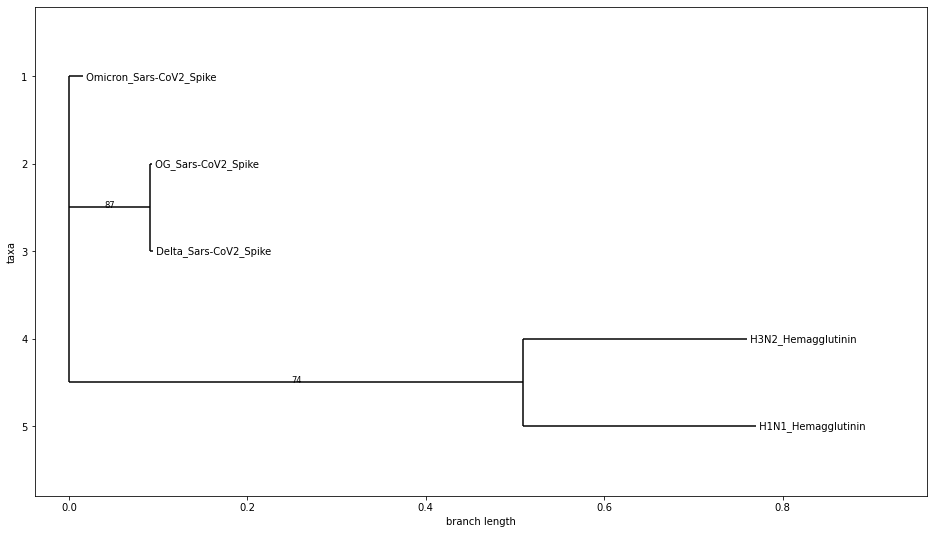

In [9]:
multi_aln = AlignIO.read("project2_outputs/multi_aligned.fasta", "fasta")

labels = ["OG_Sars-CoV2_Spike", "Delta_Sars-CoV2_Spike", "Omicron_Sars-CoV2_Spike", "H1N1_Hemagglutinin", "H3N2_Hemagglutinin"]

# Relabel sequence names
for record, label in zip(multi_aln, labels):
    record.id = label

calculator = DistanceCalculator('blosum62') # use blosum62 matrix to score distance
constructor = DistanceTreeConstructor(calculator) # create tree using the blosum62 matrix

trees = bootstrap_consensus(multi_aln, 100, constructor, majority_consensus) # create tree using 100 bootstrap replicates

# Draw figure
fig = plt.figure(figsize=(16, 9))
axes = fig.add_subplot(1, 1, 1)

Phylo.draw(trees, axes=axes)

## Phlyogentic Tree

- A phlylogenetic tree is a visual diagram that is used to display evolutionary relationships between organisms or in this case viruses.
- The data was used from the NCBI fasta files mentioned earlier.

## Differential Expression Analysis

- Differential Expression Analysis is when you gather normalized data and perform stasticial analysis to create data analysis.
- Normalized expression data between normal and COVID/influenza treated NHBE cells
- Combined and plotted normalized data against one another using plotly
- The data gathered from NCBI Geo as a tsv file.

In [10]:
count_file = "project2_files/GSE147507_RawReadCounts_Human.tsv"

# Global variable: dataframe with raw data
df = pd.read_csv(count_file, sep="\t", index_col=0)

# Normal Human Bronchial Epithelial Cells
nhbe_list = [col for col in df.columns if "NHBE" in col]

# Series1 Sars-CoV-2
covid_list = [sample for sample in nhbe_list if "Series1" in sample]

# Series9 Influenza (IAV)
iav_list = [sample for sample in nhbe_list if "Series9" in sample][:8]

In [11]:
covid_df = df[covid_list] # Create dataframe with expression levels for mock and positive covid nhbe samples
covid_df = covid_df[~(covid_df == 0).all(axis=1)]
covid_df["total"] = covid_df.sum(axis=1) # get total expression counts per gene
covid_df = covid_df.sort_values(by="total", ascending=False) # sort by highest expression counts


iav_df = df[iav_list] # Create dataframe with expression levels for mock and positive influenza nhbe samples
iav_df = iav_df[~(iav_df == 0).all(axis=1)]
iav_df["total"] = iav_df.sum(axis=1) # get total expression counts per gene
iav_df = iav_df.sort_values(by="total", ascending=False) # sort by highest expression counts


# Had to alter head to get top 10 genes found in both
covid_set = set(covid_df.head(17).index)
iav_set = set(iav_df.head(16).index)

shared_genes = covid_set.intersection(iav_set) # Get top 10 most expressed genes in both covid and influenza

covid_df = covid_df.div(covid_df["total"], axis=0) # normalize expression as proportion instead of counts
covid_df = covid_df.drop(columns=["total"])
covid_df = covid_df.loc[shared_genes, :].sort_index()

iav_df = iav_df.div(iav_df["total"], axis=0) # normalize expression as proportion instead of counts
iav_df = iav_df.drop(columns=["total"])
iav_df = iav_df.loc[shared_genes, :].sort_index()

In [12]:
# Sum all mock and positive samples in Sars-CoV-2
covid_mock = covid_df["Series1_NHBE_Mock_1"] + covid_df["Series1_NHBE_Mock_2"] + covid_df["Series1_NHBE_Mock_3"]
covid_pos = covid_df["Series1_NHBE_SARS-CoV-2_1"] + covid_df["Series1_NHBE_SARS-CoV-2_2"] + covid_df["Series1_NHBE_SARS-CoV-2_3"]

# Sum all mock and positive samples in Influenza
iav_mock = iav_df["Series9_NHBE_Mock_1"] + iav_df["Series9_NHBE_Mock_2"] + iav_df["Series9_NHBE_Mock_3"] + iav_df["Series9_NHBE_Mock_4"]
iav_pos = iav_df["Series9_NHBE_IAV_1"] + iav_df["Series9_NHBE_IAV_2"] + iav_df["Series9_NHBE_IAV_3"] + iav_df["Series9_NHBE_IAV_4"]

# Create a combined dataframe to compare
combined_df = pd.concat([covid_mock, iav_mock, covid_pos, iav_pos], axis=1)
combined_df.columns = ["Covid_Mock", "IAV_Mock", "Covid_Pos", "IAV_Pos"]

In [22]:
# create Heatmap for Sars-CoV-2 Expression
covid_fig =  px.imshow(covid_df.to_numpy().T, y=covid_df.columns, x=covid_df.index,
                       title="Normalized Expression Levels in Genes: Sars-CoV-2",
                       width=1000, height=600, text_auto='.2f')

covid_fig.update_layout(title={"font_size": 22, "x": 0.5, "y": 0.9, "xanchor": "center", "yanchor": "top"})
covid_fig.update_coloraxes(colorbar_x=1)
covid_fig.show()


In [23]:
# create Heatmap for Influenza Expression
iav_fig =  px.imshow(iav_df.to_numpy().T, y=iav_df.columns, x=iav_df.index,
                       title="Normalized Expression Levels in Genes: Influenza",
                       width=1100, height=750, text_auto='.2f')

iav_fig.update_layout(title={"font_size": 22, "x": 0.5, "y": 0.95, "xanchor": "center", "yanchor": "top"})
iav_fig.update_coloraxes(colorbar_x=0.92)
iav_fig.show()

In [24]:
# create Heatmap for combined expression
combined_fig =  px.imshow(combined_df.to_numpy().T, y=combined_df.columns, x=combined_df.index,
                       title="Normalized Expression Levels in Genes: Sars-CoV-2 vs Influenza",
                       width=1000, height=600, text_auto='.2f')

combined_fig.update_layout(title={"font_size": 22, "x": 0.5, "y": 0.85, "xanchor": "center", "yanchor": "top"})
combined_fig.update_coloraxes(colorbar_x=1.05)
combined_fig.show()

## Heat Map

- A heat map is a graph that uses a color-coding system to represent different values and the displays the main variable in interest and it's amount between two axis variables.

- The data was retrieved from tsv files from the article and was the same data used in the differential expression analysis https://www.nature.com/articles/s41598-021-95733-w .

# Data Analysis

When looking at the BLAST searches of the original COVID variany to the delta, there were 1263/1273 (or 99%) identities that overlapped each other. The same method was used when comparing the original COVID variant to omicron and there were 1237/1276 (or 97%) identities that were similiar to one another. Demonstrating that the COVID variants are very similar to one another. 

However, the BLAST search with H3N2 against the original variant showed that there were 10/20 (50%) identities that were similar to each other. H3N2 and delta showed 36/159 (23%) identities that are the same. When looking at the influenza strand (H3N2) to the omicron variant there were 48/209 (or 23%) identities that overlapped with each other. Essentially, the COVID variants against the influenza strands showed to be very different to each other. 

When looking at the phylogenetic tree, it can be seen that the closest common ancestor for H3N2, H1N1, and the COVID variants delta and omicron are is the original covid strand. This means that they both started from the same branch. However, if we were to look at it individually, it would make sense that the delta and omicron variants are the most similiar to each other and would show a common ancestry. While H3N2 and H1N1 which is the influenza strands show that they share the most common ancestor. Which shows that all together the two different groups share a common ancestory with the original COVID strand.

There are three heat maps in the analysis that show RNA sequence gene expression levels in normal human bronchial epithelial cells (NHBE). For all heat maps, the x-axis consists of the top ten most highly expressed genes in both influenza and SARS-CoV-2 samples. The SARS-CoV-2 heat map includes three regular NHBE samples and three NHBE samples treated with SARS-CoV-2. The influenza heat map includes four regular NHBE samples and four NHBE samples treated with influenza. The final heat map compares the summarized expression levels of both normal COVID and influenza samples and positively treated NHBE samples. In order to account for differing expression counts, we normalized the data by dividing each sample by the total expression count for each gene. This gives us a proportion instead of a raw value. By doing this, every column should sum up to one. 

When looking at the SARS-CoV-2 heat map, across samples there are no genes significantly expressed more than others. But sample 'Series1_NHBE_SARS-CoV-2_3' is over expressed for all genes showing to be greater than 0.3. The same situation can be seen in the influenza heat map. The one sample that stands out is 'Series9_NHBE_IAV_1' shows over expression of genes. One to be noted is LAMC2 at 0.49. The combined heat map shows two genes of interest. In KRT19, the COVID treated samples had expression levels of 0.57 vs influenza that had expression levels of 0.47 a .10 higher expression in COVID compared to influenza. In LAMC2, the COVID treated samples expression level of 0.61 versus 0.73 in influenza,  a .12 increase in influenza. 

In conclusion, sequence identity between COVID and its variants heavily differed from influenza. When comparing the COVID spike protein to the influenza HA protein, there was minimal overlap and sequence identity was very low with neither the omicron or delta variant having a sequence identity greater than 5% of that of the sequence identity of the original strand against influenza. When comparing the top ten genes expressed in both SARS-CoV-2 and NHBE cells, we found that over 50% of our genes analyzed did indeed have similar levels of expression. With 7/10 genes showing expression levels that differed by a proportion of 0.02 or less.  